In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/Airbnb data.csv')

In [3]:
dataset.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
#no. of missing values
dataset.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [5]:
dataset.shape

(18723, 20)

In [6]:
#The columns country,borough,bathrooms and minstay are completely null.
#so we drop them.
dataset.drop(columns=['country','borough','bathrooms','minstay'],inplace=True)

In [7]:
dataset.isnull().sum()

room_id                  0
survey_id                0
host_id                  0
room_type                0
city                     0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
bedrooms                 0
price                    0
name                    52
last_modified            0
latitude                 0
longitude                0
location                 0
dtype: int64

In [8]:
#name and other columns have very less null values.
#so we drop the rows corresponding to these null values.
dataset.dropna(inplace=True)

In [9]:
dataset.isnull().sum()

room_id                 0
survey_id               0
host_id                 0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
last_modified           0
latitude                0
longitude               0
location                0
dtype: int64

In [10]:
#now there are no missing values in the dataset.

In [11]:
rooms=dataset['room_type'].value_counts()

In [12]:
rooms

Entire home/apt    14937
Private room        3671
Shared room           63
Name: room_type, dtype: int64

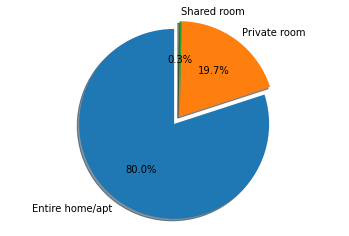

In [13]:
#visualize using pie chart

labels = ['Entire home/apt','Private room','Shared room']

explode = (0.1, 0, 0)  # only "explode" the 1st slice 

fig1, ax1 = plt.subplots()
ax1.pie(rooms, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
#Shared room is just 0.3 % of all the room types.
#Guests prefer entire home or apartment much more than the shared rooms and private rooms.

In [15]:
#finding the neighbourhood which has the most occurence in the dataset.
dataset['neighborhood'].value_counts()

De Baarsjes / Oud West                    3276
De Pijp / Rivierenbuurt                   2371
Centrum West                              2216
Centrum Oost                              1727
Westerpark                                1428
Noord-West / Noord-Midden                 1415
Oud Oost                                  1166
Bos en Lommer                              983
Oostelijk Havengebied / Indische Buurt     920
Watergraafsmeer                            514
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    377
Slotervaart                                348
Buitenveldert / Zuidas                     250
Noord West                                 240
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97
Gaasperdam / 

Text(0, 0.5, 'Counts')

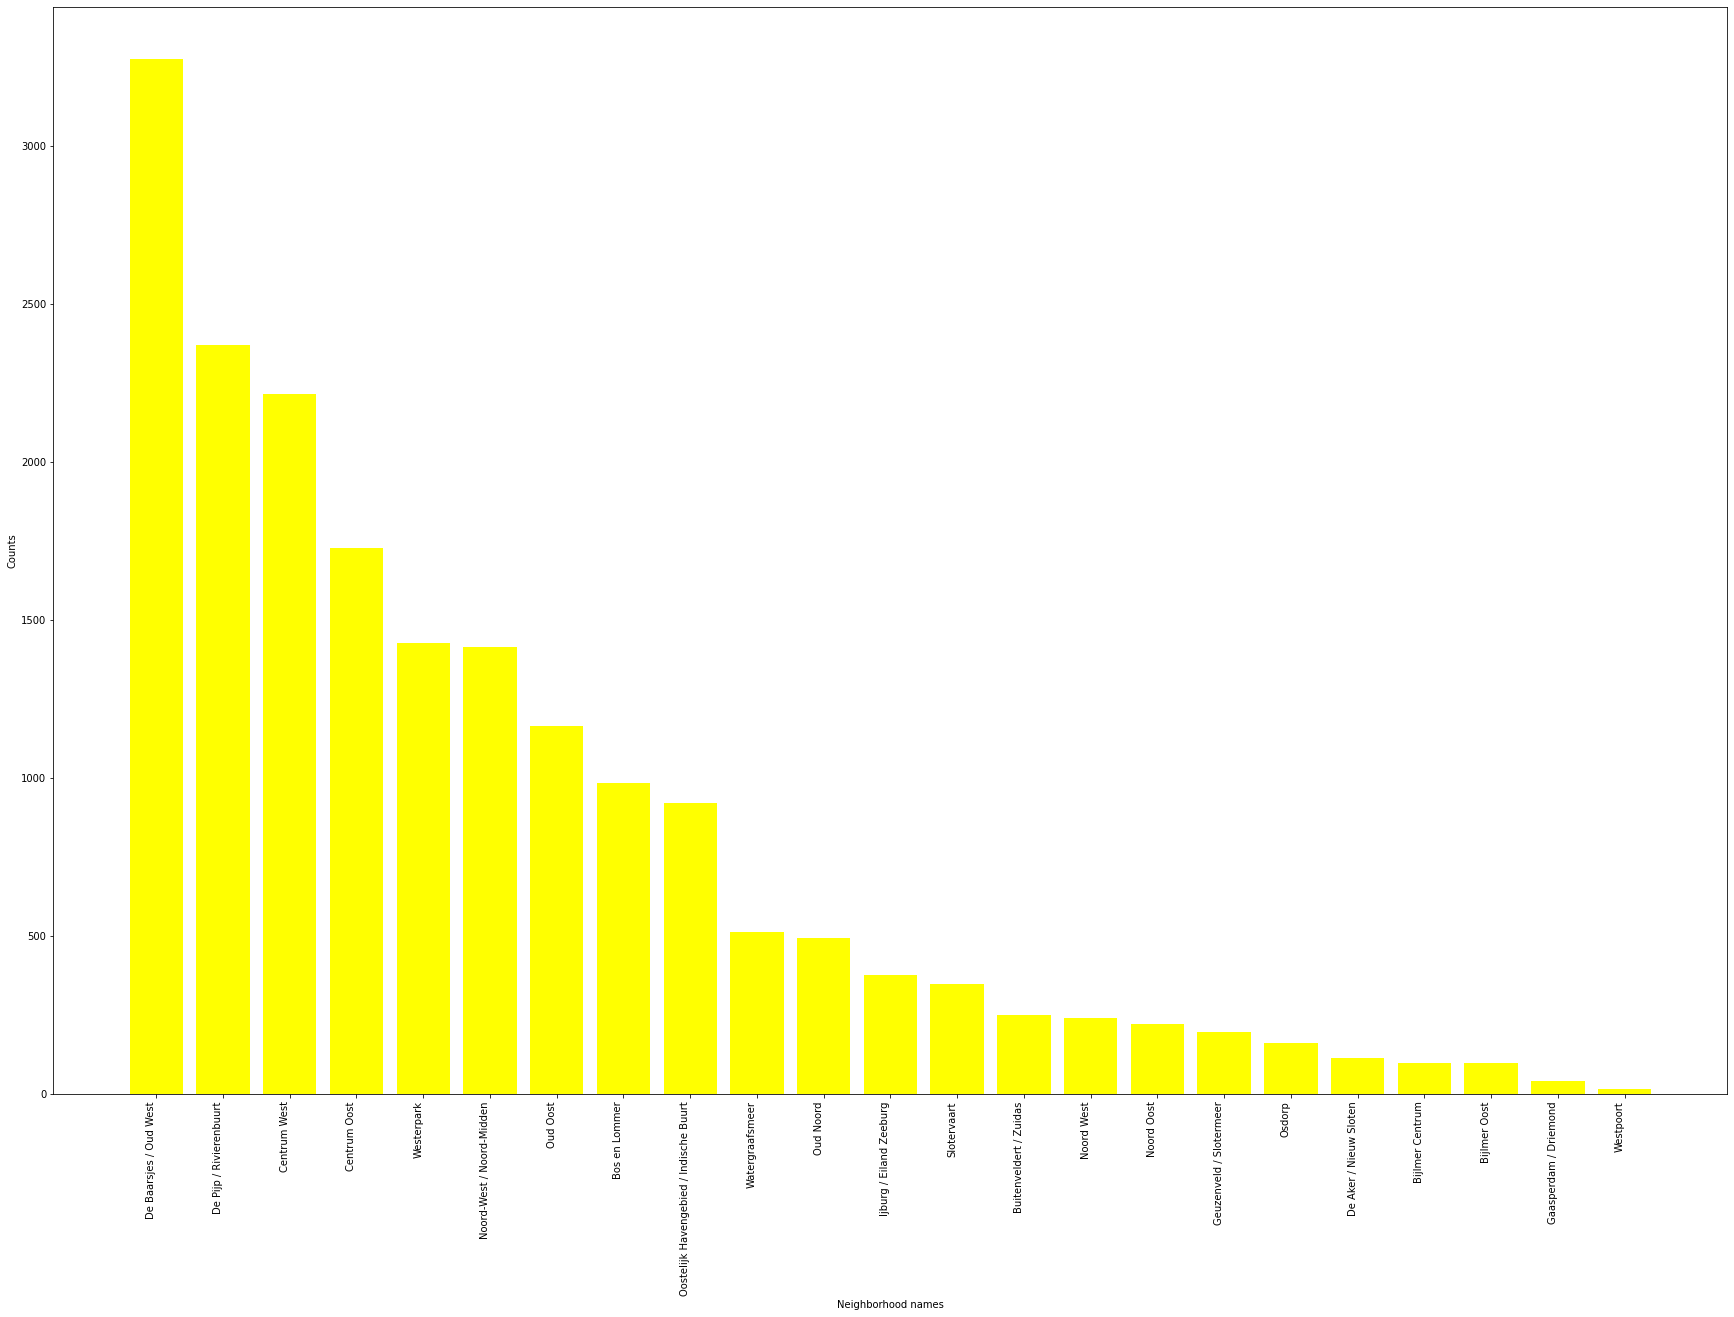

In [16]:
neighborhood_count=dataset['neighborhood'].value_counts().to_list()
figure=plt.figure(figsize=[30,20])
plt.bar(dataset['neighborhood'].value_counts().index,neighborhood_count,color='yellow')
plt.xticks(rotation=90,ha='right')
plt.xlabel('Neighborhood names')
plt.ylabel('Counts')

In [17]:
#From the graph we can see that De Baarsjes / Oud West has the most count or is the
#most popular.
#Westpoort has the least count or the least popularity.

In [18]:
dataset['reviews'].value_counts()

0      2973
1      1504
2      1240
3      1099
4       924
       ... 
191       1
334       1
309       1
235       1
188       1
Name: reviews, Length: 283, dtype: int64

In [19]:
reviews_count=pd.Series(dataset['reviews'].value_counts())
pd.set_option("display.max_rows",None,"display.max_columns",None)
#print(reviews_count)

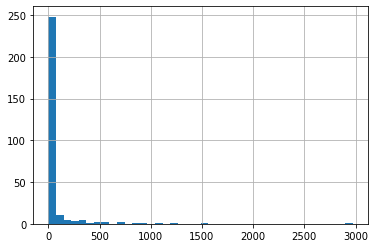

In [20]:
#plotting histogram for showing count for each review.
reviews_count.hist(bins=40)

In [21]:
#from the above data and histogram we find that count of reviews 0 to 20 are
#comparatively higher than other values.

In [22]:
dataset['overall_satisfaction'].value_counts()

5.0    7693
0.0    5725
4.5    4546
4.0     576
3.5     109
3.0      19
1.5       1
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [23]:
#from above we get the overall satisfaction count w.r.to ratings.

Text(0.5, 1.0, 'Overall Satisfaction Count VS Rating')

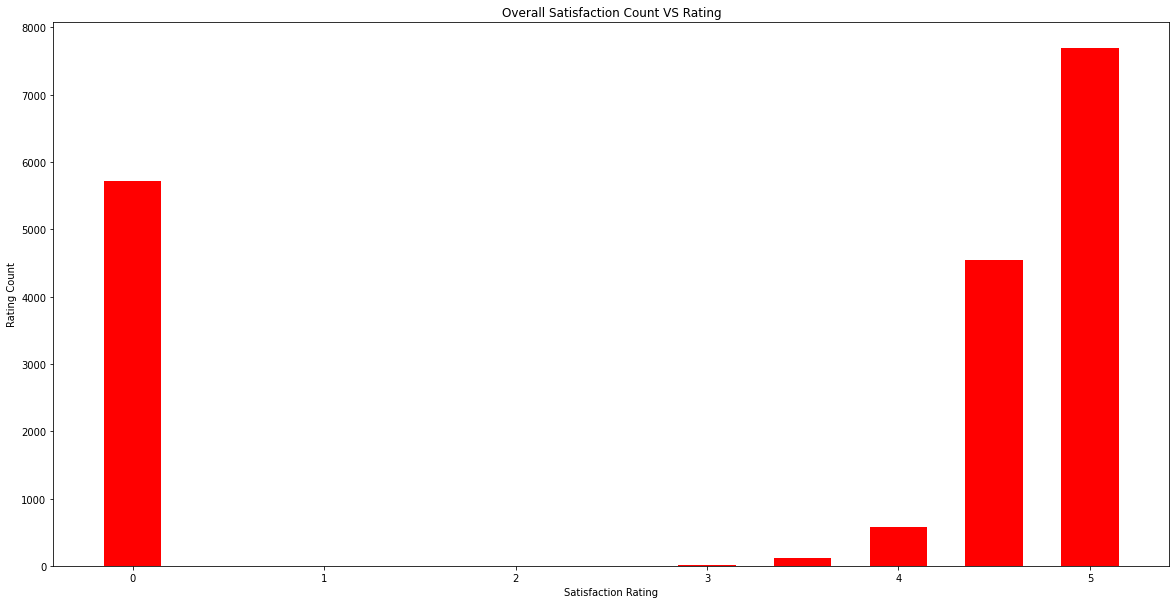

In [24]:
fig=plt.figure(figsize=[20,10])
plt.bar(dataset['overall_satisfaction'].value_counts().index,dataset['overall_satisfaction'].value_counts().to_list(),color='red',width=0.3)
plt.xlabel('Satisfaction Rating')
plt.ylabel('Rating Count')
plt.title("Overall Satisfaction Count VS Rating")

In [25]:
#from the dataset and graph above we find that Satisfaction rating 5.0 has the 
#maximum count i.e. a large community of people are satisfied by the services
#provided by Airbnb.

In [26]:
#count of accomodation values
accomodation_counts=dataset['accommodates'].value_counts()
accomodation_counts

2     9991
4     5571
3     1579
6      473
5      471
1      365
8      105
7       52
16      20
10      16
12      10
9        8
14       6
11       2
13       1
17       1
Name: accommodates, dtype: int64

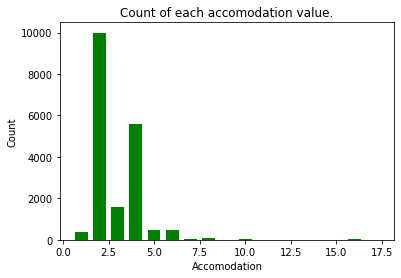

In [27]:
size=accomodation_counts.to_list()
labels=accomodation_counts.index
plt.bar(labels,size,width=0.7,color='green')
plt.xlabel("Accomodation")
plt.ylabel("Count")
plt.title("Count of each accomodation value.")
plt.show()

In [28]:
#from above we can see that the most available accomodations are 2 and 4.

In [29]:
#most properties available.
most_prop_available=dataset['price'].value_counts()
#print(most_prop_available)

In [30]:
graph={'Price':most_prop_available.index.to_list(),'Properties Available':most_prop_available.to_list()}
most_prop_available_df=pd.DataFrame(graph)
#most_prop_available_df

In [31]:
#from the dataframe above we can conclude that price = 180 has the maximimum properties.

In [32]:
#info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18671 entries, 0 to 18722
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18671 non-null  int64  
 1   survey_id             18671 non-null  int64  
 2   host_id               18671 non-null  int64  
 3   room_type             18671 non-null  object 
 4   city                  18671 non-null  object 
 5   neighborhood          18671 non-null  object 
 6   reviews               18671 non-null  int64  
 7   overall_satisfaction  18671 non-null  float64
 8   accommodates          18671 non-null  int64  
 9   bedrooms              18671 non-null  float64
 10  price                 18671 non-null  float64
 11  name                  18671 non-null  object 
 12  last_modified         18671 non-null  object 
 13  latitude              18671 non-null  float64
 14  longitude             18671 non-null  float64
 15  location           

Text(0.5, 1.0, 'Relationship between Price and Reviews')

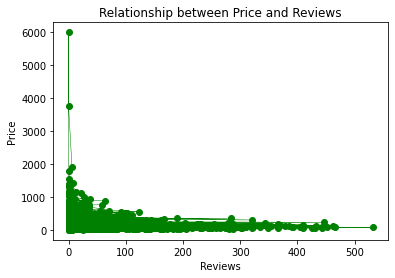

In [33]:
#checking relationship between price and reviews.
plt.plot(dataset['reviews'],dataset['price'],marker='o',c='green',linewidth=0.5)
plt.xlabel("Reviews")
plt.ylabel("Price")
plt.title("Relationship between Price and Reviews")

In [34]:
#finding correlation
from scipy.stats import pearsonr
correlation,_=pearsonr(dataset['reviews'],dataset['price'])
print('Pearson Correlation: %3f'%correlation)

Pearson Correlation: -0.084839


In [35]:
#we find negative trend relationship between price and reviews.
#so,if no. of reviews increase then prices will decrease.

In [36]:
dataset.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'city', 'neighborhood',
       'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price',
       'name', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [37]:
df=dataset[['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price']]
correlation=df.corr()
print(correlation)

                       reviews  overall_satisfaction  accommodates  bedrooms  \
reviews               1.000000              0.316649     -0.061713 -0.114480   
overall_satisfaction  0.316649              1.000000     -0.054160 -0.087913   
accommodates         -0.061713             -0.054160      1.000000  0.710973   
bedrooms             -0.114480             -0.087913      0.710973  1.000000   
price                -0.084839             -0.045055      0.500239  0.445950   

                         price  
reviews              -0.084839  
overall_satisfaction -0.045055  
accommodates          0.500239  
bedrooms              0.445950  
price                 1.000000  


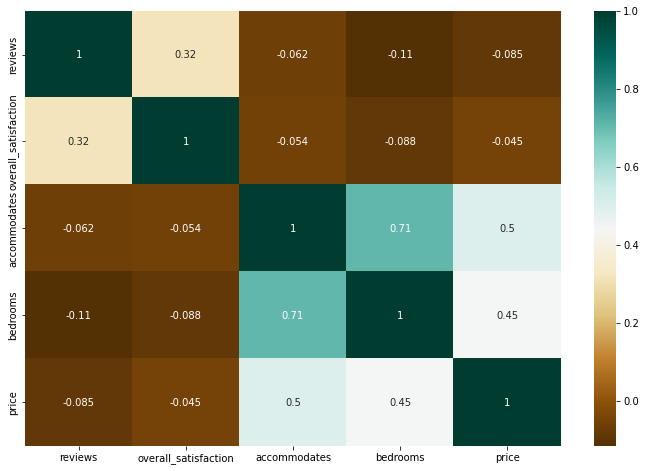

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,cmap = 'BrBG', annot = True)
plt.show()

In [39]:
#above is a heatmap showing correlation between different attributes of the dataset.

Text(0.5, 1.0, 'Relationship between price and accomodates')

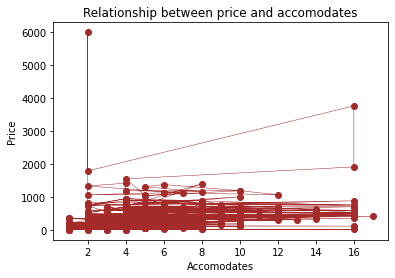

In [40]:
#checking relationship between price and accomodates.
plt.plot(dataset['accommodates'],dataset['price'],marker='o',c='brown',linewidth=0.5)
plt.xlabel("Accomodates")
plt.ylabel("Price")
plt.title("Relationship between price and accomodates")

In [41]:
#finding correlation by Pearson coefficient.
correlation,_=pearsonr(dataset['accommodates'],dataset['price'])
print('Pearson correlation: %3f' % correlation)

Pearson correlation: 0.500239


In [42]:
#from the above graph and correlation value we find that there is slightly positive
#or weak positive correlation or relationship between price and accomodates.
#if no. of accomodates increase then price will also increase.

Text(0.5, 1.0, 'Relationship between Price And Overall Satisfaction')

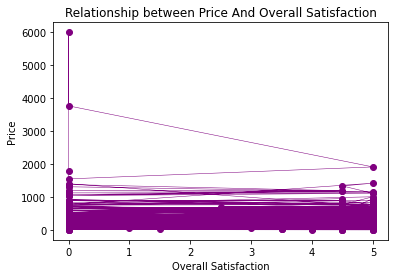

In [43]:
#finding relationship between price and Overall Satisfaction
plt.plot(dataset['overall_satisfaction'],dataset['price'],marker='o',c='purple',linewidth=0.5)
plt.xlabel("Overall Satisfaction")
plt.ylabel("Price")
plt.title("Relationship between Price And Overall Satisfaction")

In [44]:
#correlation by Pearson correlation coefficient
correlation,_=pearsonr(dataset['overall_satisfaction'],dataset['price'])
print('Pearson Correlation: %3f' % correlation)

Pearson Correlation: -0.045055


In [45]:
#from above graph and correlation value we see that there is negative linear
#relationship between overall_satisfaction and price.
#if overall satisfaction increases then price will decrease.

In [46]:
#dataset['bedrooms']

In [47]:
#share of different bedroom values int total bedroom value.
bedroom_count=dataset['bedrooms'].value_counts()
Totalbedrooms=bedroom_count.sum()
data={'Bedroom_values':bedroom_count.index.to_list(),'Share/Proportion':bedroom_count.to_list()}
bedroom_count_df=pd.DataFrame(data)
print("Total no. of Bedrooms available : ",Totalbedrooms)
print(dataset.shape)

Total no. of Bedrooms available :  18671
(18671, 16)


In [48]:
print("Each bedroom's share : ")
bedroom_count_df

Each bedroom's share : 


,Bedroom_values,Share/Proportion
0,1.0,11068
1,2.0,4446
2,3.0,1442
3,0.0,1148
4,4.0,472
5,5.0,62
6,6.0,19
7,10.0,5
8,7.0,4
9,8.0,3


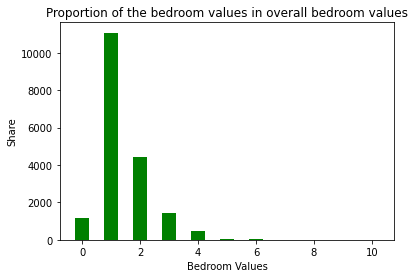

In [49]:
sizes=bedroom_count.to_list()
labels=bedroom_count.index.to_list()
plt.bar(labels,sizes,width=0.5,color='green')
plt.xlabel("Bedroom Values")
plt.ylabel("Share")
plt.title("Proportion of the bedroom values in overall bedroom values")
plt.show()

In [50]:
#It is clear from graph above that bedroom values 1 and 2 have the most share in overall bedroom values.

Text(0.5, 1.0, 'Histogram for Reviews Column')

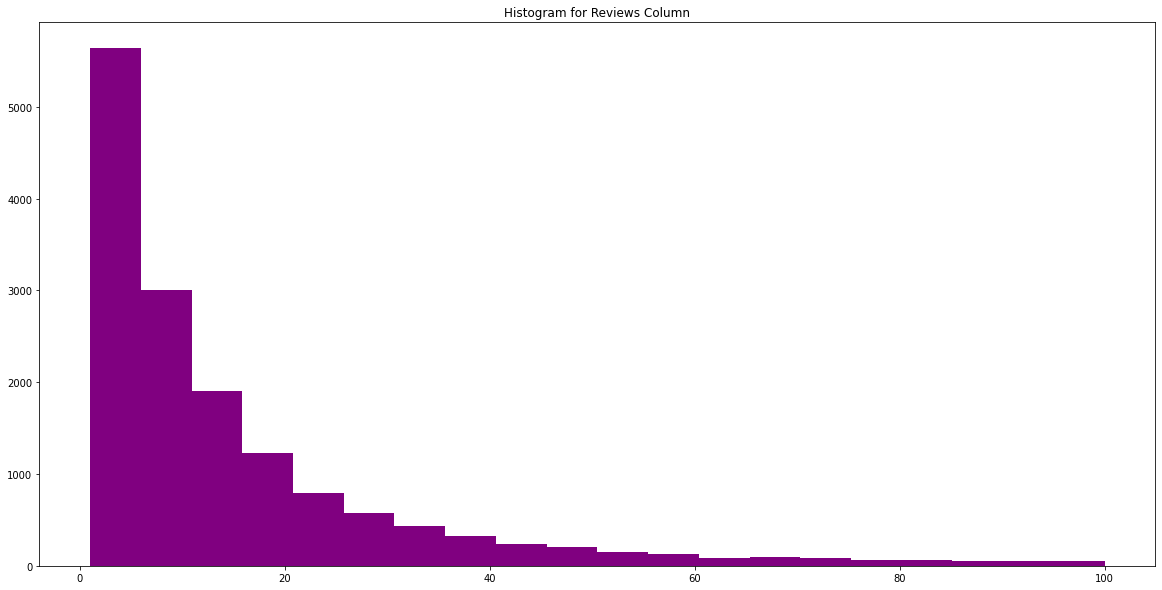

In [51]:
#Histogram plot of reviews column.
fig=plt.figure(figsize=[20,10])
plt.hist('reviews',bins=20,range=(1,100),data=dataset,color='purple')
plt.title("Histogram for Reviews Column")

Text(0.5, 1.0, 'Histogram for Overall_Satisfaction Column')

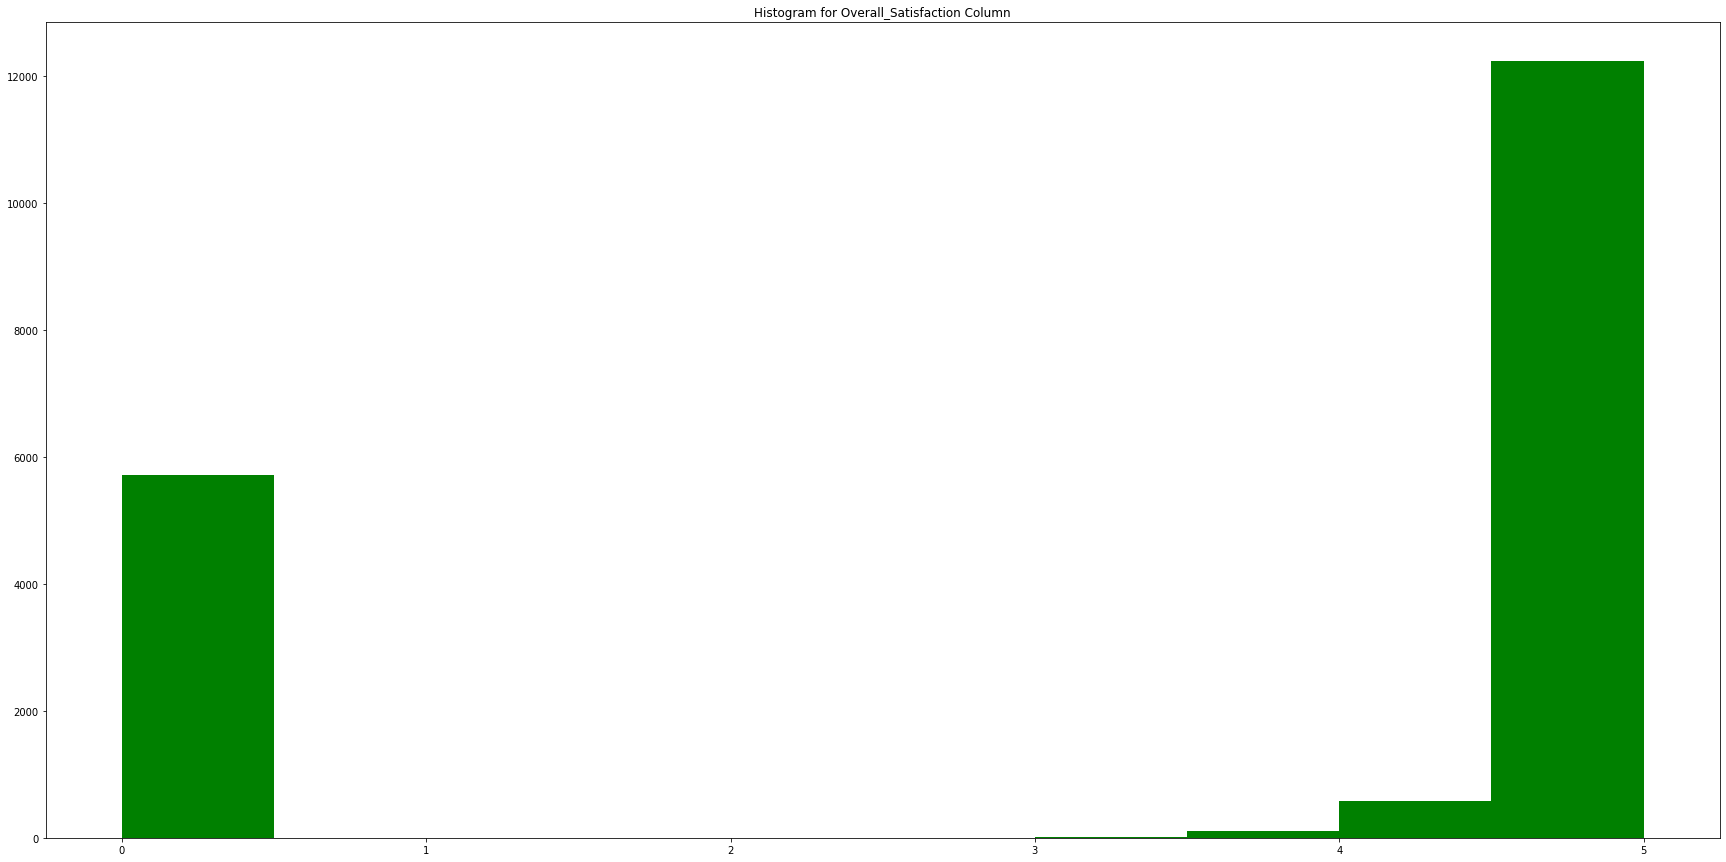

In [52]:
#Histogram plot of overall_satisfaction column.
fig=plt.figure(figsize=[30,15])
plt.hist('overall_satisfaction',bins=10,data=dataset,color='green')
plt.title('Histogram for Overall_Satisfaction Column')